**Problem Statement:**

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
amzn_sl=pd.read_csv("/content/Amazon Sales data.csv")

In [ ]:
amzn_sl.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [ ]:
amzn_sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
amzn_sl["Order Date"]=pd.to_datetime(amzn_sl["Order Date"])
amzn_sl["Ship Date"]=pd.to_datetime(amzn_sl["Ship Date"])

In [ ]:
missing_values=amzn_sl.isnull().sum()
print(missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
duplicated_row=amzn_sl[amzn_sl.duplicated()]
print(duplicated_row)

Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit]
Index: []


In [ ]:
amzn_sl["Region"].unique()


array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [ ]:
amzn_sl["Item Type"].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [ ]:
amzn_sl["Country"].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [ ]:
amzn_sl.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [ ]:
expected_revenues= amzn_sl["Unit Price"] * amzn_sl["Units Sold"]

discrepancies = amzn_sl["Total Revenue"]- expected_revenues
amzn_sl['Discrepancies_revenue'] = discrepancies.where(discrepancies != 0, 0)

print(amzn_sl)


                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

In [ ]:

amzn_sl['Total Cost'] = amzn_sl['Units Sold'] * amzn_sl['Unit Cost']

amzn_sl['Total Profit'] = amzn_sl['Total Revenue'] - amzn_sl['Total Cost']


amzn_sl['Discrepancies_cost'] = (amzn_sl['Total Cost'] - amzn_sl['Units Sold'] * amzn_sl['Unit Cost']).round(2)

amzn_sl['Discrepancies_profit'] = (amzn_sl['Total Profit'] - (amzn_sl['Total Revenue'] - amzn_sl['Total Cost'])).round(2)


amzn_sl['Discrepancies_cost'] = amzn_sl['Discrepancies_cost'].apply(lambda x: 0 if abs(x) < 1e-6 else x)

amzn_sl['Discrepancies_profit'] = amzn_sl['Discrepancies_profit'].apply(lambda x: 0 if abs(x) < 1e-6 else x)


amzn_sl.drop(columns=['Discrepancies_cost', 'Discrepancies_revenue', 'Discrepancies_profit'], inplace=True)



In [ ]:
priority_mapping={ "L":"Low", "M":"Medium", "H":"High", "C":"Critical"}

amzn_sl["Order Priority"]=amzn_sl["Order Priority"].map(priority_mapping)

In [ ]:
priority_ranking={ "Low": 4, "Medium": 3, "High": 2, "Critical": 1}
amzn_sl["Order Priority Rank"]= amzn_sl["Order Priority"].map(priority_ranking)

In [ ]:
amzn_sl.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Priority Rank
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,1
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,4
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,1
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,4


In [ ]:
amzn_sl["Order year"]=amzn_sl["Order Date"].dt.year
amzn_sl["Order month name"]=amzn_sl["Order Date"].dt.month_name()
amzn_sl["Order month"] = amzn_sl["Order Date"].dt.month
amzn_sl["Order day"] = amzn_sl["Order Date"].dt.day
amzn_sl["Order day name"] = amzn_sl["Order Date"].dt.day_name()

In [ ]:
amzn_sl['Profit Margin'] = (amzn_sl['Total Profit'] / amzn_sl['Total Revenue']) * 100

In [ ]:
amzn_sl.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,Order Priority Rank,Order year,Order month name,Order month,Order day,Order day name,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,High,2010-05-28,669165933,2010-06-27,9925,255.28,...,2533654.00,1582243.50,951410.50,2,2010,May,5,28,Friday,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,Critical,2012-08-22,963881480,2012-09-15,2804,205.70,...,576782.80,328376.44,248406.36,1,2012,August,8,22,Wednesday,43.067574
2,Europe,Russia,Office Supplies,Offline,Low,2014-05-02,341417157,2014-05-08,1779,651.21,...,1158502.59,933903.84,224598.75,4,2014,May,5,2,Friday,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,Critical,2014-06-20,514321792,2014-07-05,8102,9.33,...,75591.66,56065.84,19525.82,1,2014,June,6,20,Friday,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,Low,2013-02-01,115456712,2013-02-06,5062,651.21,...,3296425.02,2657347.52,639077.50,4,2013,February,2,1,Friday,19.386987


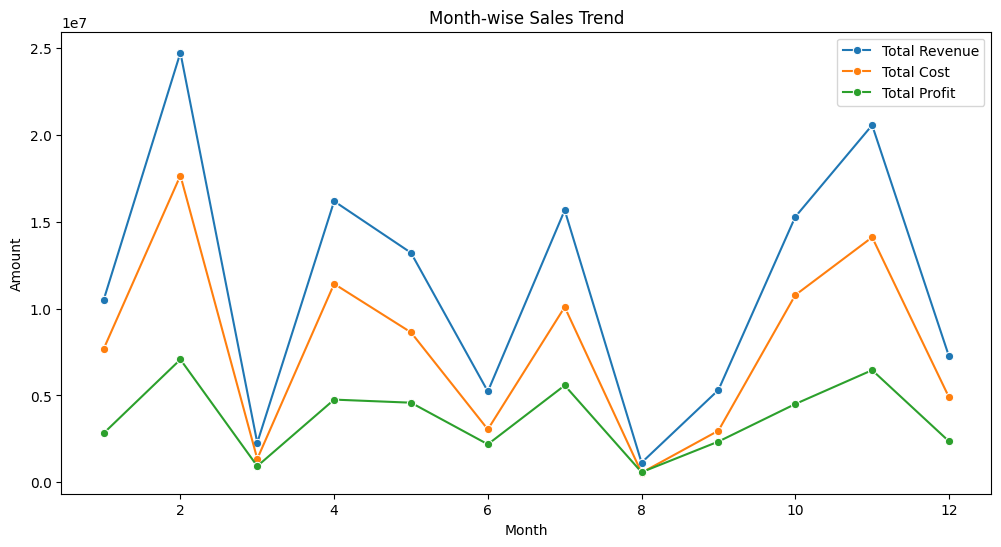

In [ ]:
# Month-wise sales trend
month_wise_sales = amzn_sl.groupby('Order month').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plot month-wise sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_wise_sales, x='Order month', y='Total Revenue',marker='o', label='Total Revenue')
sns.lineplot(data=month_wise_sales, x='Order month', y='Total Cost', marker='o', label='Total Cost')
sns.lineplot(data=month_wise_sales, x='Order month', y='Total Profit',marker='o', label='Total Profit')

plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()


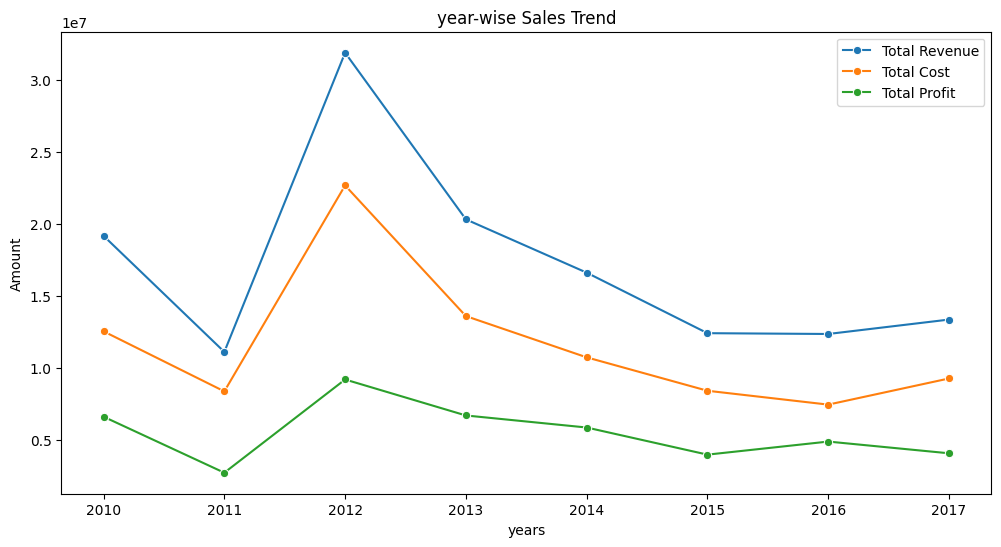

In [ ]:
# Year-wise sales trend
year_wise_sales = amzn_sl.groupby('Order year').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plot Year-wise sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_wise_sales, x='Order year', y='Total Revenue',marker='o', label='Total Revenue')
sns.lineplot(data=year_wise_sales, x='Order year', y='Total Cost',marker='o', label='Total Cost')
sns.lineplot(data=year_wise_sales, x='Order year', y='Total Profit',marker='o', label='Total Profit')

plt.title('year-wise Sales Trend')
plt.xlabel('years')
plt.ylabel('Amount')
plt.legend()
plt.show()


**Yearly-monthly trends**

In [ ]:
amzn_sl['Year-Month'] = amzn_sl['Order Date'].dt.to_period('M')



Yearly-Monthly Sales Trend:
Year-Month
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.50
2015-02    200

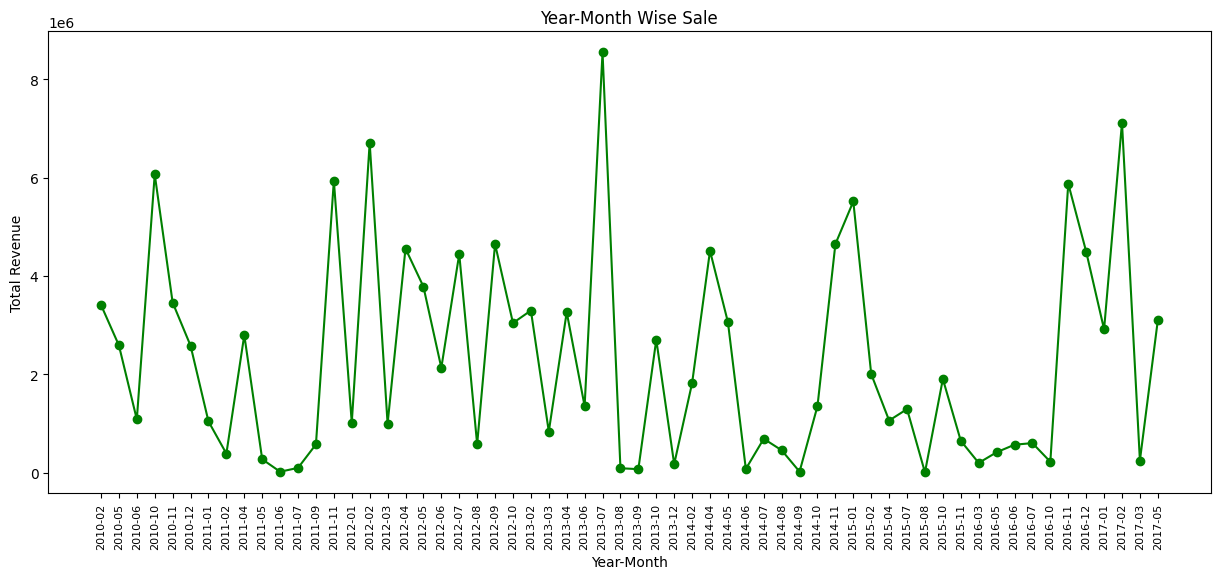

In [ ]:
yearly_monthly_sales = amzn_sl.groupby('Year-Month')['Total Revenue'].sum()
print("\nYearly-Monthly Sales Trend:")
print(yearly_monthly_sales)
plt.figure(figsize=(15, 6))
plt.title("Year-Month Wise Sale")
plt.plot(yearly_monthly_sales.index.astype(str), yearly_monthly_sales.values, marker='o', color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.show()

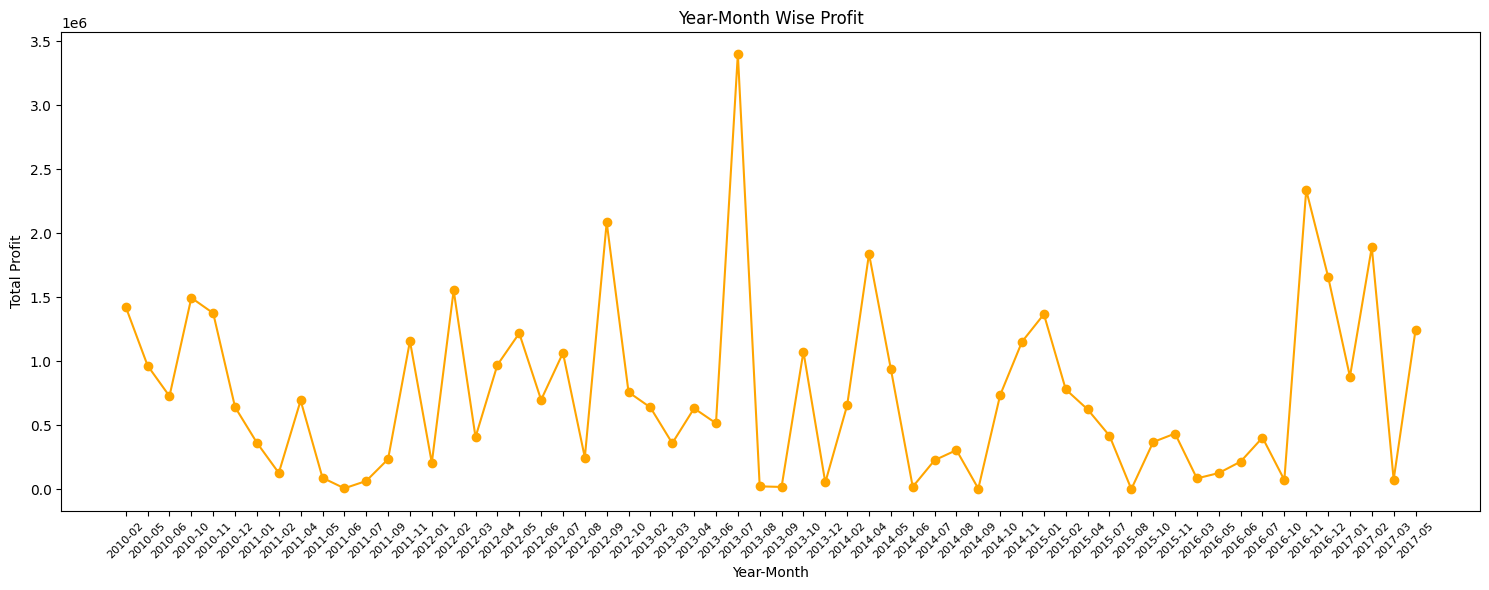

In [ ]:

# Group by 'Year-Month' and sum 'Total Profit'
df_trend = amzn_sl.groupby('Year-Month').agg({'Total Profit': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))
plt.title("Year-Month Wise Profit")
plt.plot(df_trend['Year-Month'].astype(str), df_trend['Total Profit'], marker='o', color='orange')
plt.xticks(rotation=45, size=8)
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

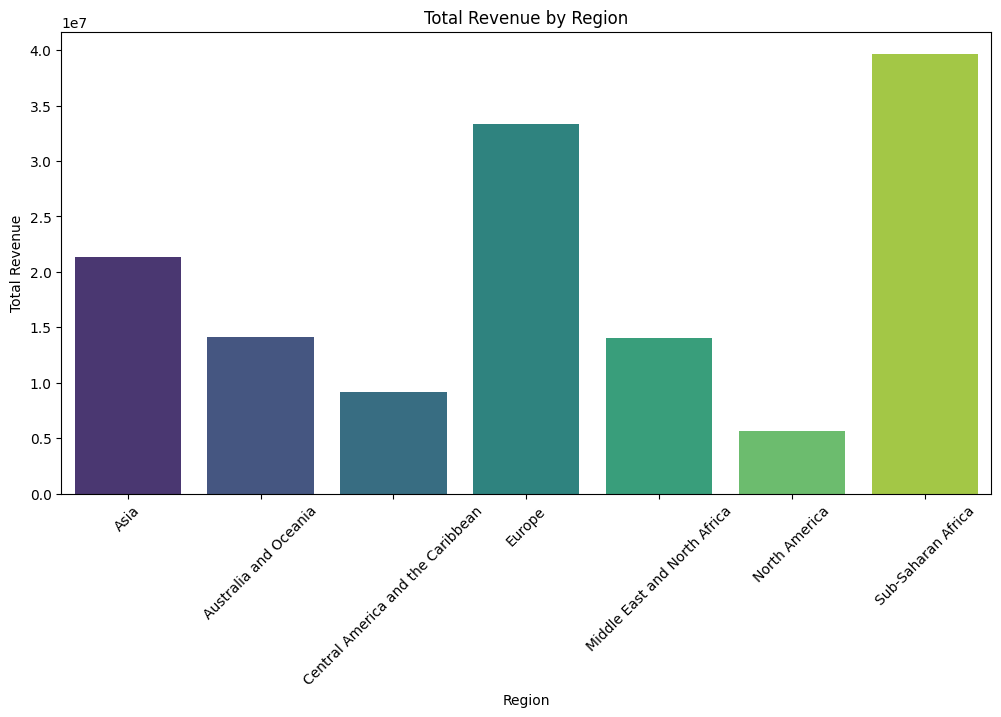

In [ ]:
# Group by Region
region_wise_sales = amzn_sl.groupby('Region').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Plot region-wise total revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=region_wise_sales, x='Region', y='Total Revenue',hue='Region',palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


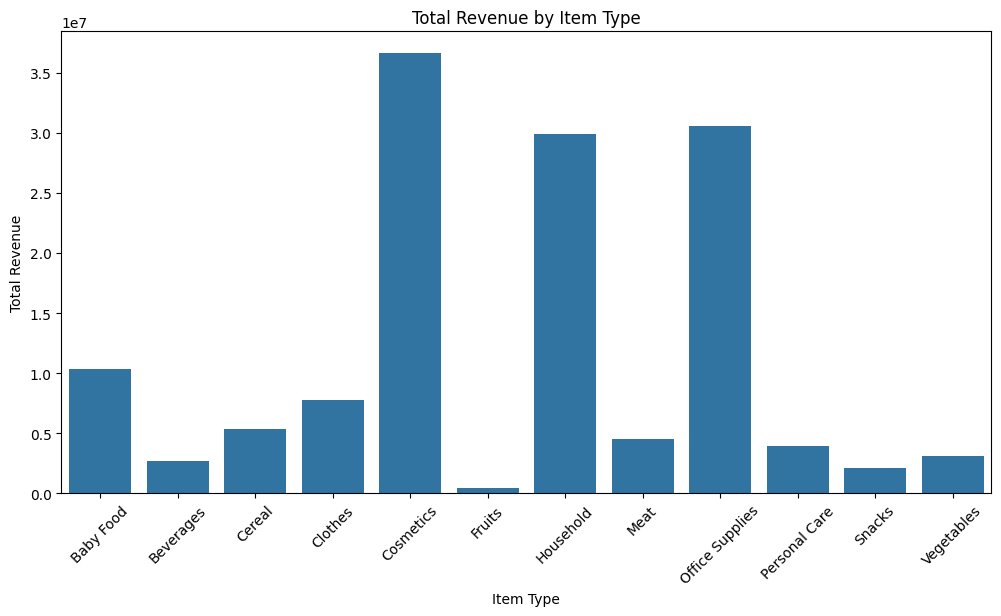

In [ ]:
# Group by Item Type
item_type_wise_sales = amzn_sl.groupby('Item Type').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Plot item type-wise total revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=item_type_wise_sales, x='Item Type', y='Total Revenue')
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


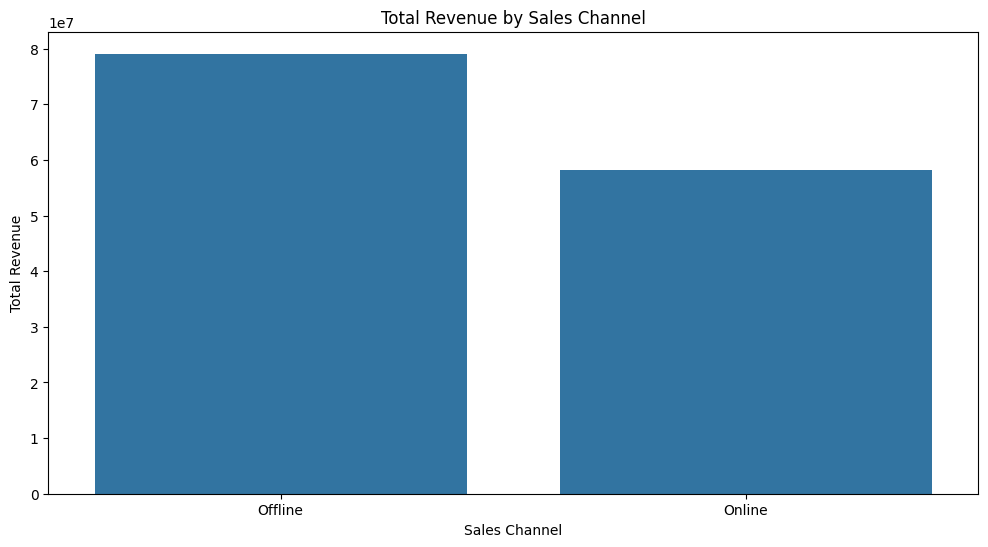

In [ ]:
# Group by Sales Channel
sales_channel_wise_sales = amzn_sl.groupby('Sales Channel').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Plot sales channel-wise total revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_channel_wise_sales, x='Sales Channel', y='Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
cleaned_file_path = "/content/Cleaned_Amazon_Sales_Data.csv"
amzn_sl.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to /content/Cleaned_Amazon_Sales_Data.csv
